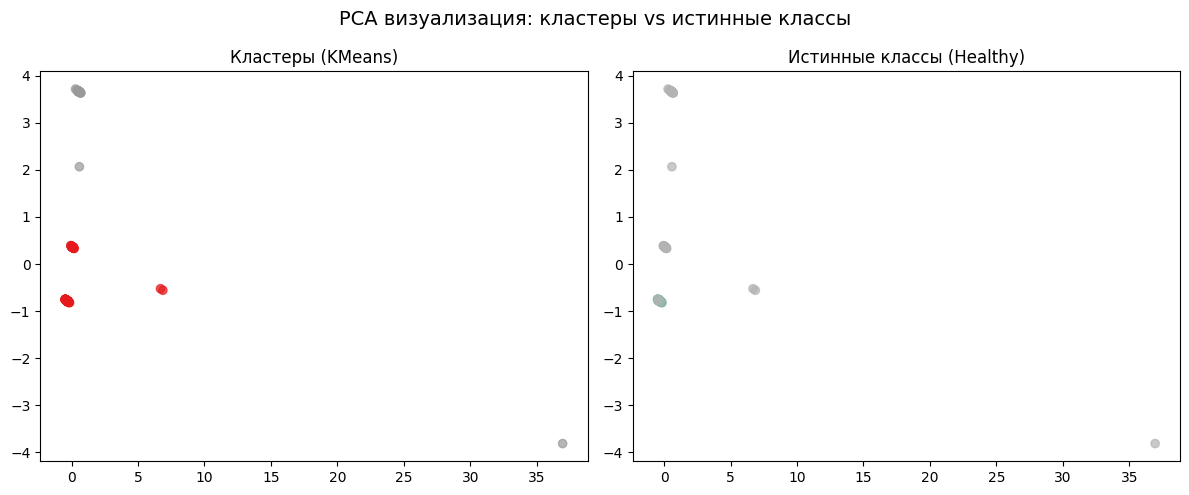

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ecg_data.csv")
df.replace(29990, np.nan, inplace=True)
df = df.fillna(df.median(numeric_only=True))

X = df.drop(columns=["Healthy"])
y = df["Healthy"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="Set1", alpha=0.7)
axs[0].set_title("Кластеры (KMeans)")

axs[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="Set2", alpha=0.7)
axs[1].set_title("Истинные классы (Healthy)")

plt.suptitle("PCA визуализация: кластеры vs истинные классы", fontsize=14)
plt.tight_layout()
plt.show()


In [24]:
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Healthy"] = y
pca_df["Cluster"] = clusters

pca_df["Distance"] = np.sqrt(pca_df["PC1"]**2 + pca_df["PC2"]**2)

outliers = pca_df.sort_values("Distance", ascending=False).head(10)

print("Ненорм строки:")
print(outliers[["PC1", "PC2", "Distance", "Healthy", "Cluster"]])

outlier_indices = outliers.index
df_outliers = df.iloc[outlier_indices]

df_outliers = df_outliers.copy()
df_outliers["Cluster"] = clusters[outlier_indices]
df_outliers["Distance"] = outliers["Distance"].values

import pandas as pd
from IPython.display import display

pd.set_option("display.max_columns", None)
print("\nШумы:")
display(df_outliers)


Ненорм строки:
           PC1       PC2   Distance  Healthy  Cluster
151  36.947822 -3.813231  37.144074        1        1
53    6.865134 -0.557048   6.887697        1        0
227   6.689998 -0.524171   6.710501        1        0
104   0.297897  3.717056   3.728974        1        1
161   0.400741  3.696039   3.717700        1        1
205   0.477745  3.679775   3.710659        1        1
154   0.477123  3.679798   3.710601        1        1
230   0.486490  3.678103   3.710137        1        1
34    0.485449  3.678181   3.710078        1        1
103   0.489120  3.677271   3.709658        1        1

Шумы:


,Healthy,rr_interval,p_onset,p_end,qrs_onset,qrs_end,t_end,p_axis,qrs_axis,t_axis,Cluster,Distance
151,1,29999,29999,29999,29999,29999,29999,29999,29999,29999,1,37.144074
53,1,800,40,160,290,364,678,29999,29999,29999,0,6.887697
227,1,618,40,76,98,242,478,29999,29999,29999,0,6.710501
104,1,377,29999,29999,65,141,377,29999,79,-94,1,3.728974
161,1,454,29999,29999,116,296,454,29999,-45,141,1,3.717700
205,1,588,29999,29999,200,308,556,29999,-22,62,1,3.710659
154,1,606,29999,29999,200,306,574,29999,-41,0,1,3.710601
230,1,571,29999,29999,193,287,571,29999,34,149,1,3.710137
34,1,594,29999,29999,200,294,576,29999,71,10,1,3.710078
103,1,631,29999,29999,200,316,548,29999,-53,98,1,3.709658


In [25]:
df_clean = df.replace(29999, np.nan)
df_clean = df_clean.dropna()

print(f"{len(df_clean)} строк")


216 строк
